<a href="https://colab.research.google.com/github/ankitojha2705/Hopping-Window-Mean-Aggregation/blob/main/HoppingWindow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Generate the Time Series Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample time series DataFrame
data = {
    'timestamp': pd.date_range(start='2024-01-01', periods=100, freq='h'),
    'value': np.random.randint(1, 10, 100)
}
df = pd.DataFrame(data)
df.set_index('timestamp', inplace=True)


# Step 2: Define Window Parameters
  Set the window and hop sizes to control the aggregation.

In [2]:
window_size = '3h'  # Window duration (3 hours)
hop_size = '1h'     # Hop interval (1 hour)


# Step 3: Calculate the Hopping Window Mean
  Apply the hopping window function to calculate the mean. In this example, we use a custom approach to mimic hopping windows:

In [3]:
# Initialize an empty list to store the mean values
hopping_means = []

# Calculate the mean for each hopping window
for start in range(0, len(df) - 2):
    window_data = df.iloc[start:start+3]  # Extract a 3-hour window
    mean_value = window_data['value'].mean()
    hopping_means.append(mean_value)

# Add NaN values at the end to match the DataFrame length
hopping_means += [np.nan, np.nan]  # To align with original length

# Store the hopping means in the DataFrame
df['hopping_mean'] = hopping_means


# Step 4: Plot the Results
  This part will visualize the data by plotting the original values and the calculated hopping mean.

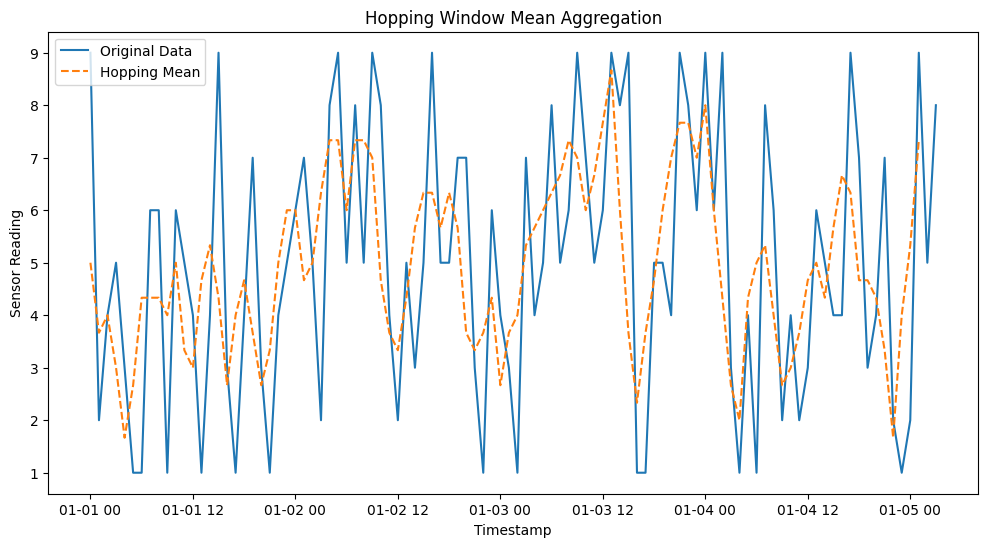

In [4]:
# Reset index to prepare for plotting
df = df.reset_index()

# Plot the original data and hopping mean
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Original Data')
plt.plot(df['timestamp'], df['hopping_mean'], label='Hopping Mean', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Reading')
plt.legend()
plt.title('Hopping Window Mean Aggregation')
plt.show()
